# LOAD UP EVERYTHING

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
plt.rc('font', size = 15)
sns.set()

In [2]:
pwd

'/Users/jbender/Desktop/python'

In [3]:
#ingest the file 
df = pd.read_csv('./Test_Export_Final_employee_corp_scrubb.txt', sep = '\t', low_memory = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412005 entries, 0 to 412004
Data columns (total 14 columns):
Party_Id                  412005 non-null int64
Gregorian_Month_Nbr       412005 non-null int64
Gregorian_Year_Nbr        412005 non-null int64
Loyalty_Member            412005 non-null int64
Credit_Card_Member        412005 non-null int64
Gift Indicated            412005 non-null int64
Gift Wrapped              412005 non-null int64
Registry Gift             412005 non-null int64
Purchased                 412005 non-null int64
Units                     412005 non-null int64
Orders                    412005 non-null int64
Revenue                   412005 non-null float64
Visits                    412005 non-null int64
Product Viewing Visits    412005 non-null int64
dtypes: float64(1), int64(13)
memory usage: 44.0 MB


/Users/jbender/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


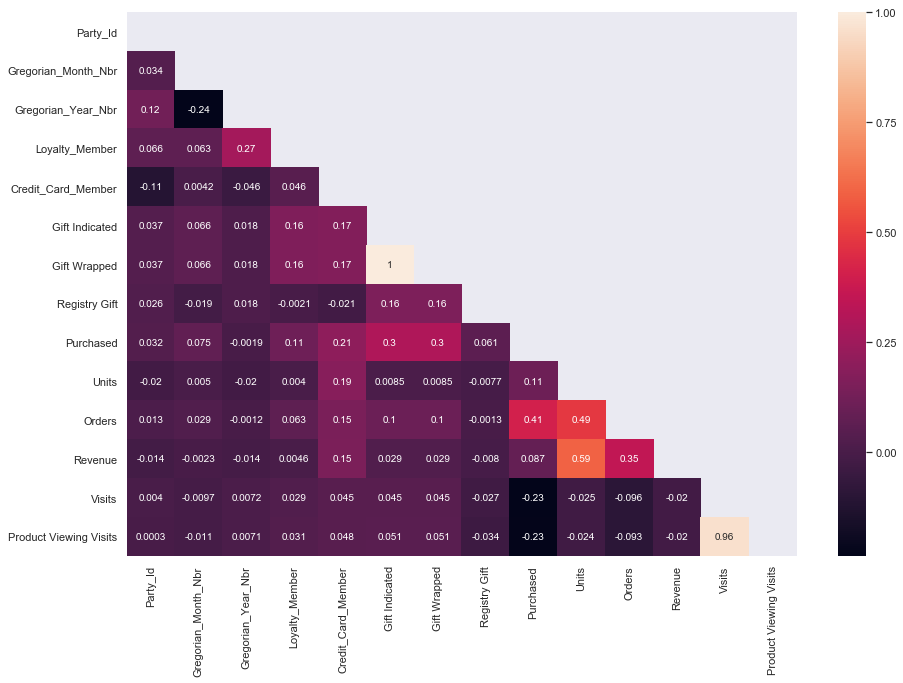

In [5]:
#look at some initial correlations across the features
plt.figure(figsize = (15,10))
corr = df.corr().dropna((0, 1))
# Generate a mask for the upper triangle
hide_upper = np.zeros_like(corr, dtype=np.bool)
hide_upper[np.triu_indices_from(hide_upper)] = True
sns.heatmap(df.corr(),mask=hide_upper, annot = True)

In [25]:
#wow there are some huge extremes at the revenue and unit level
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Party_Id,412005.0,2.445013e+08,9.751221e+07,59282099.0,164957804.0,269578291.0,326257819.0,3.881576e+08
Gregorian_Month_Nbr,412005.0,6.897419e+00,3.519653e+00,1.0,4.0,7.0,10.0,1.200000e+01
Gregorian_Year_Nbr,412005.0,2.017047e+03,7.745852e-01,2016.0,2016.0,2017.0,2018.0,2.018000e+03
Loyalty_Member,412005.0,4.573974e-02,2.089204e-01,0.0,0.0,0.0,0.0,1.000000e+00
Credit_Card_Member,412005.0,1.383915e-01,3.453109e-01,0.0,0.0,0.0,0.0,1.000000e+00
Gift Indicated,412005.0,3.988422e-01,4.896608e-01,0.0,0.0,0.0,1.0,1.000000e+00
Gift Wrapped,412005.0,3.988422e-01,4.896608e-01,0.0,0.0,0.0,1.0,1.000000e+00
Registry Gift,412005.0,2.381039e-02,1.524582e-01,0.0,0.0,0.0,0.0,1.000000e+00
Purchased,412005.0,3.732989e-01,4.836811e-01,0.0,0.0,0.0,1.0,1.000000e+00
Units,412005.0,2.217847e+01,2.688638e+02,0.0,0.0,0.0,2.0,5.068800e+04


# DATA CLEANING

In [26]:
df['time_indicator'] = (12 * df['Gregorian_Year_Nbr'])+ df['Gregorian_Month_Nbr']

#make a dataframe that is current. and a dataframe that is one month ago. join current dataframe w/ 1 month ago dataframe.

#Drop everything else from purchased

#make a time indicator value 12 * year + month



In [27]:
past_df = df.copy()

In [28]:
past_df.time_indicator += 1

In [29]:
past_df = pd.merge(past_df, df[['time_indicator', 'Party_Id', 'Purchased']], on=['time_indicator', 'Party_Id'], suffixes=('', '_Future'))

In [30]:
past_df.T

,0,1,2,3,4,5,6,7,8,9,...,293466,293467,293468,293469,293470,293471,293472,293473,293474,293475
Party_Id,356690687.0,356690687.0,81923253.0,274601505.0,64779737.0,303558252.0,303558252.0,303558252.0,303558252.0,77190894.0,...,320379682.0,320379682.0,294836342.0,249683612.0,1.526184e+08,279879582.0,185301494.0,185301494.0,238429336.0,68231082.0
Gregorian_Month_Nbr,3.0,3.0,11.0,1.0,5.0,7.0,7.0,7.0,7.0,4.0,...,6.0,6.0,10.0,1.0,1.200000e+01,8.0,8.0,8.0,5.0,7.0
Gregorian_Year_Nbr,2018.0,2018.0,2016.0,2018.0,2018.0,2017.0,2017.0,2017.0,2017.0,2017.0,...,2017.0,2017.0,2016.0,2018.0,2.016000e+03,2016.0,2018.0,2018.0,2016.0,2018.0
Loyalty_Member,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Credit_Card_Member,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Gift Indicated,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Gift Wrapped,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Registry Gift,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Purchased,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000e+00,1.0,1.0,1.0,0.0,0.0
Units,1.0,0.0,0.0,0.0,0.0,13.0,0.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.000000e+00,8.0,4.0,4.0,0.0,0.0


In [31]:
#reformating my month values as strings
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.astype(str)

In [32]:
#there's a sexier way to do this, but it was faster than lamba
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.replace(to_replace=('1'),value="01")
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.replace(to_replace=('2'),value="02")
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.replace(to_replace=('3'),value="03")
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.replace(to_replace=('4'),value="04")
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.replace(to_replace=('5'),value="05")
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.replace(to_replace=('6'),value="06")
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.replace(to_replace=('7'),value="07")
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.replace(to_replace=('8'),value="08")
past_df['Gregorian_Month_Nbr'] = past_df.Gregorian_Month_Nbr.replace(to_replace=('9'),value="09")

In [33]:
past_df['Gregorian_Month_Nbr'].unique()

array(['03', '11', '01', '05', '07', '04', '12', '06', '02', '10', '08',
       '09'], dtype=object)

In [34]:
past_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293476 entries, 0 to 293475
Data columns (total 16 columns):
Party_Id                  293476 non-null int64
Gregorian_Month_Nbr       293476 non-null object
Gregorian_Year_Nbr        293476 non-null int64
Loyalty_Member            293476 non-null int64
Credit_Card_Member        293476 non-null int64
Gift Indicated            293476 non-null int64
Gift Wrapped              293476 non-null int64
Registry Gift             293476 non-null int64
Purchased                 293476 non-null int64
Units                     293476 non-null int64
Orders                    293476 non-null int64
Revenue                   293476 non-null float64
Visits                    293476 non-null int64
Product Viewing Visits    293476 non-null int64
time_indicator            293476 non-null int64
Purchased_Future          293476 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 48.1+ MB


In [35]:
past_df['Gregorian_Year_Nbr']= past_df['Gregorian_Year_Nbr'].astype('str')
past_df['month_year'] = past_df['Gregorian_Year_Nbr']+ past_df['Gregorian_Month_Nbr']


In [36]:
#I noticed in my EDA that 201601 didn't actually have any data since it's not part of the Fiscal 2016, so I'm going to drop it
past_df = past_df[past_df.month_year!='201601']
past_df = past_df[past_df.month_year!='201811']

In [37]:
#validating the drop worked
m_list = past_df['month_year'].unique().tolist()
m_list.sort()

In [38]:
print(m_list)

['201602', '201603', '201604', '201605', '201606', '201607', '201608', '201609', '201610', '201611', '201612', '201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810']


In [39]:
past_df.head()

,Party_Id,Gregorian_Month_Nbr,Gregorian_Year_Nbr,Loyalty_Member,Credit_Card_Member,Gift Indicated,Gift Wrapped,Registry Gift,Purchased,Units,Orders,Revenue,Visits,Product Viewing Visits,time_indicator,Purchased_Future,month_year
0,356690687,03,2018,0,0,1,1,0,1,1,1,79.0,0,0,24220,0,201803
1,356690687,03,2018,0,0,1,1,0,0,0,0,0.0,13,11,24220,0,201803
2,81923253,11,2016,0,0,0,0,0,0,0,0,0.0,4,1,24204,0,201611
3,274601505,01,2018,0,0,0,0,0,0,0,0,0.0,4,3,24218,0,201801
4,64779737,05,2018,0,0,0,0,0,0,0,0,0.0,5,4,24222,0,201805


In [40]:
#EDA Dataset
df_eda = pd.DataFrame(past_df.groupby(['Party_Id','month_year','Gregorian_Year_Nbr','Gregorian_Month_Nbr'])
                          .agg({'Loyalty_Member':'any','Credit_Card_Member':'any','Gift Indicated':'any','Gift Wrapped':'any','Registry Gift':'any','Purchased':'sum','Units':'sum','Orders':'sum','Revenue':'sum'}).reset_index())

In [41]:
df_eda

,Party_Id,month_year,Gregorian_Year_Nbr,Gregorian_Month_Nbr,Loyalty_Member,Credit_Card_Member,Gift Indicated,Gift Wrapped,Registry Gift,Purchased,Units,Orders,Revenue
0,59282099,201804,2018,04,False,False,False,False,False,1,4,1,11.08
1,59311661,201707,2017,07,False,False,False,False,False,0,0,0,0.00
2,59311661,201708,2017,08,False,False,False,False,False,0,0,0,0.00
3,59311661,201709,2017,09,False,False,False,False,False,0,0,0,0.00
4,59311661,201710,2017,10,False,False,True,True,False,2,2,2,98.00
5,59311661,201711,2017,11,False,False,True,True,False,1,2,1,98.00
6,59311661,201808,2018,08,False,False,False,False,False,0,0,0,0.00
7,59311661,201809,2018,09,False,False,False,False,False,0,0,0,0.00
8,59311661,201810,2018,10,False,False,True,True,False,1,2,1,54.40
9,59315180,201603,2016,03,False,False,True,True,False,2,16,4,2445.68


# Exploratory Data Analysis Time!

In [42]:
df_trend = pd.DataFrame(past_df.groupby(['month_year','Party_Id'])['Units','Orders','Revenue'].agg('sum',axis=1).reset_index())

In [43]:
#group purchases by the purchasing attributes
df_pat = pd.DataFrame(df.groupby(['Loyalty_Member','Credit_Card_Member','Gift Indicated','Gift Wrapped','Registry Gift'])
                             .agg({'Party_Id':'nunique','Units':'sum','Orders':'sum','Revenue':'sum'}).reset_index())

In [44]:
#group purchases by the purchasing attributes
df_custlvl = pd.DataFrame(df.groupby(['Party_Id'])
                          .agg({'Loyalty_Member':'any','Credit_Card_Member':'any','Gift Indicated':'any','Gift Wrapped':'any','Registry Gift':'any','Units':'sum','Orders':'sum','Revenue':'sum'}).reset_index())

Text(0,0.5,'Customer Group')

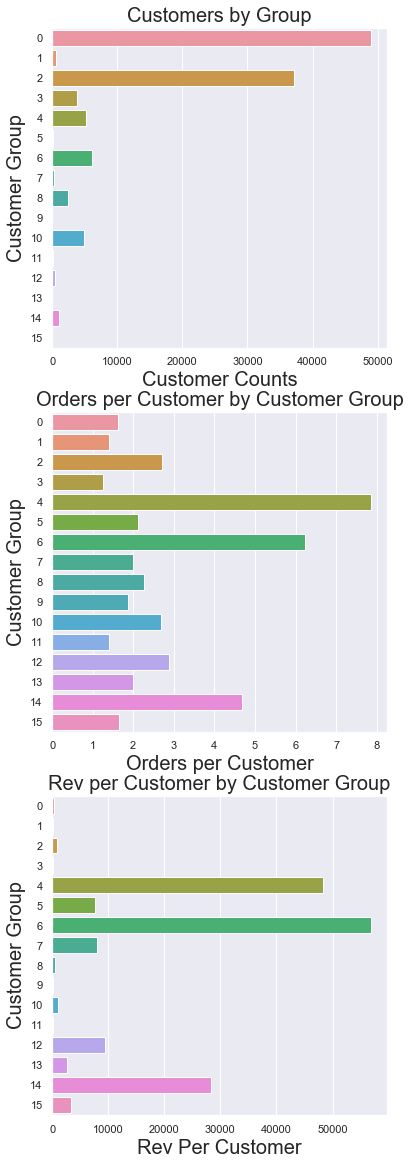

In [45]:
#what's the largest customer population and which drive the most orders/revenue/most expensive orders?
sns.set_style("darkgrid")
plt.figure(figsize=(6,20))
plt.subplot(3,1,1)
sns.barplot(y=df_pat.index.values,x=df_pat['Party_Id'],data=df_pat,orient='h')
plt.xlabel('Customer Counts', size = 20)
plt.title('Customers by Group', size = 20)
plt.ylabel('Customer Group', size = 20)

plt.subplot(3,1,2)
sns.barplot(x=df_pat['Orders']/df_pat['Party_Id'],y=df_pat.index.values,data=df_pat,orient='h')
plt.xlabel('Orders per Customer', size = 20)
plt.title('Orders per Customer by Customer Group', size = 20)
plt.ylabel('Customer Group', size = 20)

plt.subplot(3,1,3)
sns.barplot(y=df_pat.index.values,x=df_pat['Revenue']/df_pat['Party_Id'],data=df_pat,orient='h')
plt.xlabel('Rev Per Customer', size = 20)
plt.title('Rev per Customer by Customer Group', size = 20)
plt.ylabel('Customer Group', size = 20)


Text(0.5,0,'Gift Wrapped')

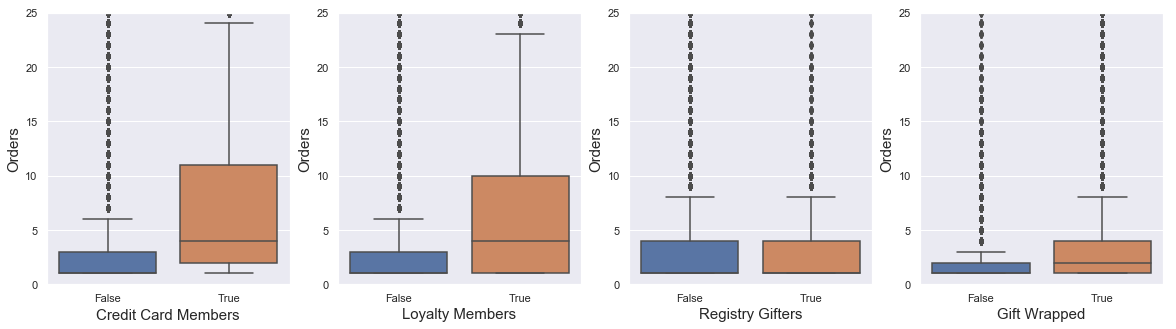

In [46]:
#Orders by Feature Group
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.ylim(0,25)
sns.boxplot(y= 'Orders',x= 'Credit_Card_Member',data=df_custlvl,orient='v')
plt.ylabel('Orders',size = 15)
plt.xlabel('Credit Card Members', size = 15)

plt.subplot(1,4,2)
plt.ylim(0,25)
sns.boxplot(y=df_custlvl['Orders'],x='Loyalty_Member',data=df_custlvl,orient='v')
plt.ylabel('Orders',size = 15)
plt.xlabel('Loyalty Members', size = 15)

plt.subplot(1,4,3)
plt.ylim(0,25)
sns.boxplot(y=df_custlvl['Orders'],x='Registry Gift',data=df_custlvl,orient='v')
plt.ylabel('Orders',size = 15)
plt.xlabel('Registry Gifters', size = 15)

plt.subplot(1,4,4)
plt.ylim(0,25)
sns.boxplot(y=df_custlvl['Orders'],x='Gift Wrapped',data=df_custlvl,orient='v')
plt.ylabel('Orders',size = 15)
plt.xlabel('Gift Wrapped', size = 15)


Text(0.5,0,'Gift Wrapped')

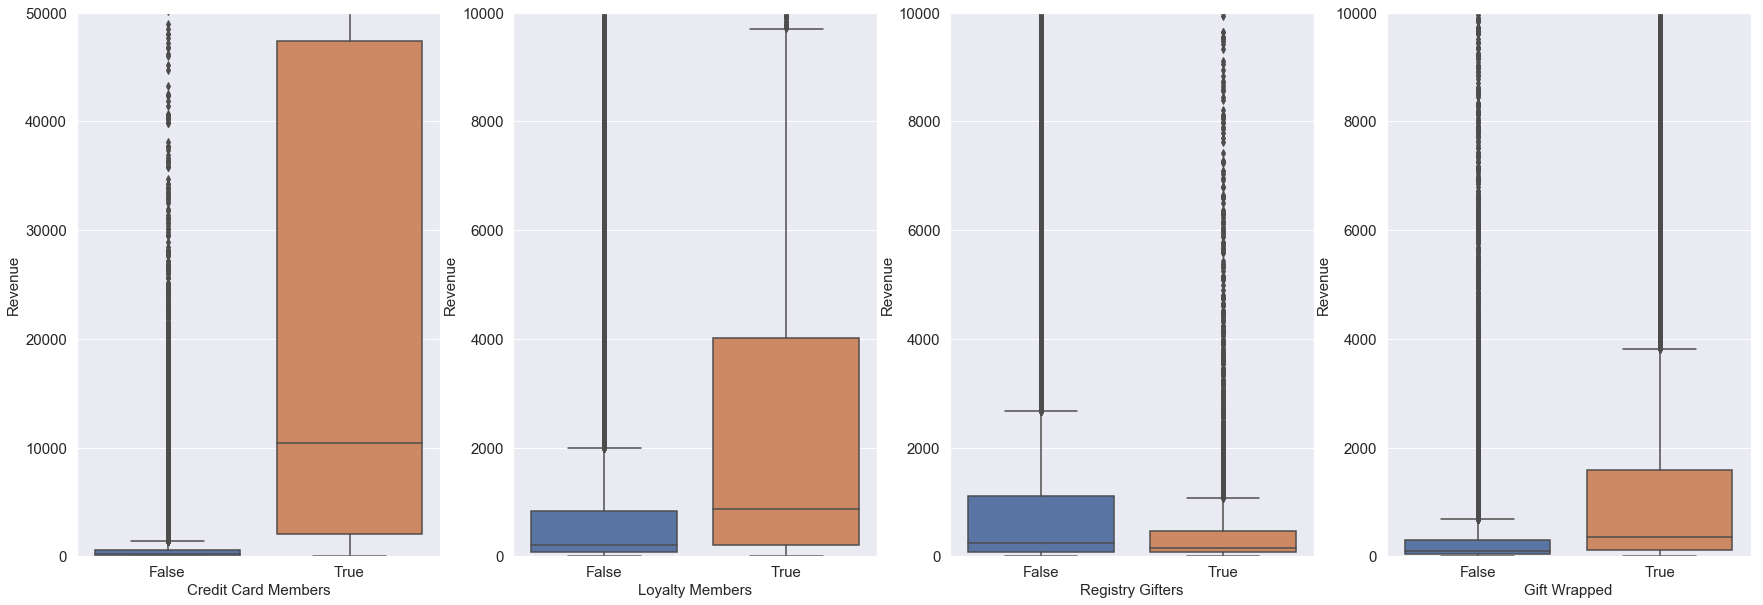

In [47]:
#revenue
plt.figure(figsize=(30,10))

plt.subplot(1,4,1)

sns.boxplot(y= 'Revenue',x= 'Credit_Card_Member',data=df_custlvl,orient='v')
plt.ylim(0,50000)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Revenue',size = 15)
plt.xlabel('Credit Card Members', size = 15)

plt.subplot(1,4,2)
plt.ylim(0,10000)
sns.boxplot(y='Revenue',x='Loyalty_Member',data=df_custlvl,orient='v')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Revenue',size = 15)
plt.xlabel('Loyalty Members', size = 15)

plt.subplot(1,4,3)
plt.ylim(0,10000)
sns.boxplot(y='Revenue',x='Registry Gift',data=df_custlvl,orient='v')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Revenue',size = 15)
plt.xlabel('Registry Gifters', size = 15)

plt.subplot(1,4,4)
plt.ylim(0,10000)
sns.boxplot(y='Revenue',x='Gift Wrapped',data=df_custlvl,orient='v')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Revenue',size = 15)
plt.xlabel('Gift Wrapped', size = 15)


In [48]:
#key for the above tables. Gotta be a great way to layer this on next to the table right?
#So our biggest population is, no shocker, people without any 
df_pat.iloc[:,0:5]

,Loyalty_Member,Credit_Card_Member,Gift Indicated,Gift Wrapped,Registry Gift
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,1,1,0
3,0,0,1,1,1
4,0,1,0,0,0
5,0,1,0,0,1
6,0,1,1,1,0
7,0,1,1,1,1
8,1,0,0,0,0
9,1,0,0,0,1


/Users/jbender/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


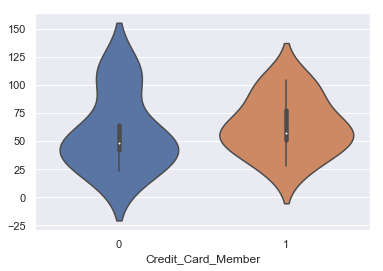

In [49]:
sns.violinplot(x='Credit_Card_Member',y=df_pat['Revenue']/df_pat['Units'],data=df_pat)

In [50]:
df_custcnt = pd.DataFrame(past_df.groupby(['month_year','Gregorian_Month_Nbr','Gregorian_Year_Nbr']).agg({'Party_Id':'nunique','Units':'sum','Orders':'sum','Revenue':'sum'}).reset_index())

In [51]:
df_custcnt['AOV']=df_custcnt['Revenue']/df_custcnt['Orders']
df_custcnt['AUR']=df_custcnt['Revenue']/df_custcnt['Units']
df_custcnt['Orders Per Customer']=df_custcnt['Orders']/df_custcnt['Party_Id']
df_custcnt['Units Per Customer']=df_custcnt['Units']/df_custcnt['Party_Id']
df_custcnt['Rev Per Customer']=df_custcnt['Revenue']/df_custcnt['Party_Id']

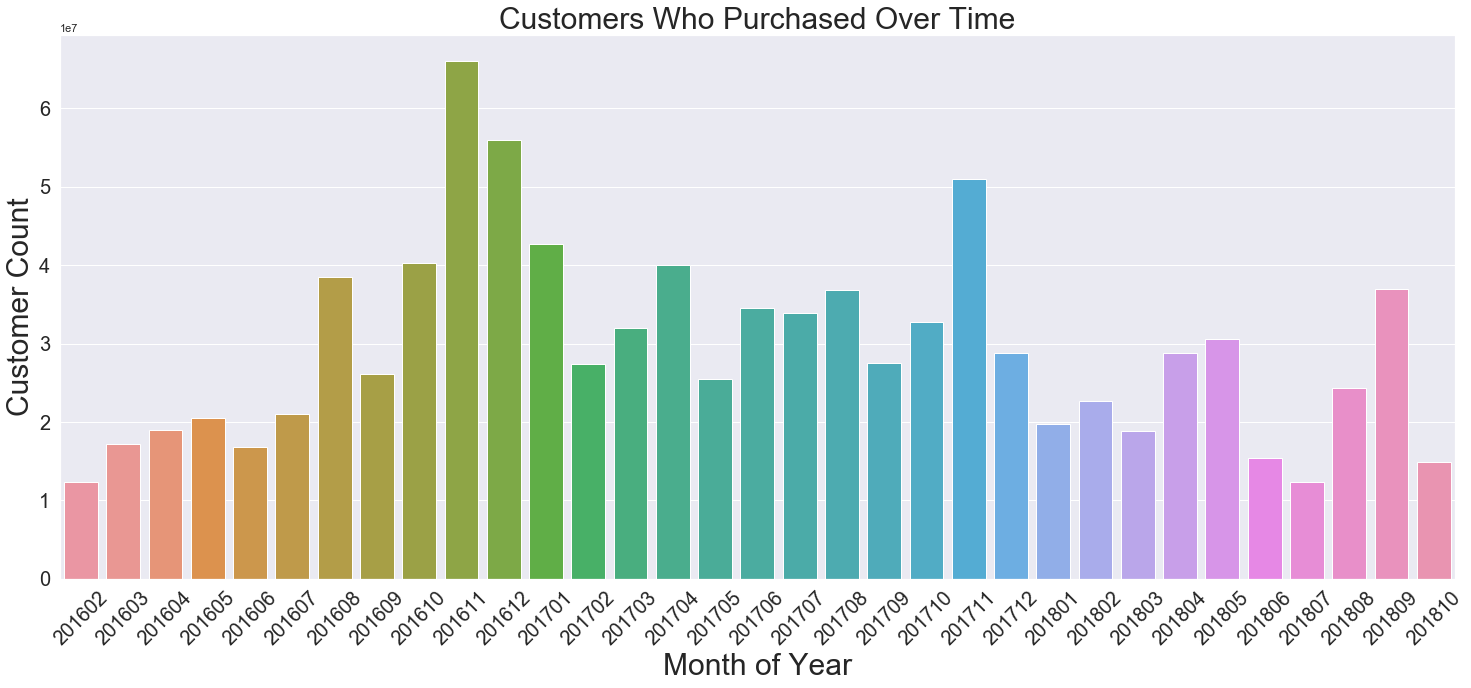

In [52]:
#let's look at customer purchase behavior over time
plt.figure(figsize=(25,10))
Graph = sns.barplot(x='month_year',y='Revenue',data=df_custcnt)
plt.xticks(rotation=45, size = 20)
plt.yticks(size=20)
plt.title('Customers Who Purchased Over Time', size = 30)
plt.ylabel('Customer Count', size = 30)
plt.xlabel('Month of Year', size = 30)
plt.show()

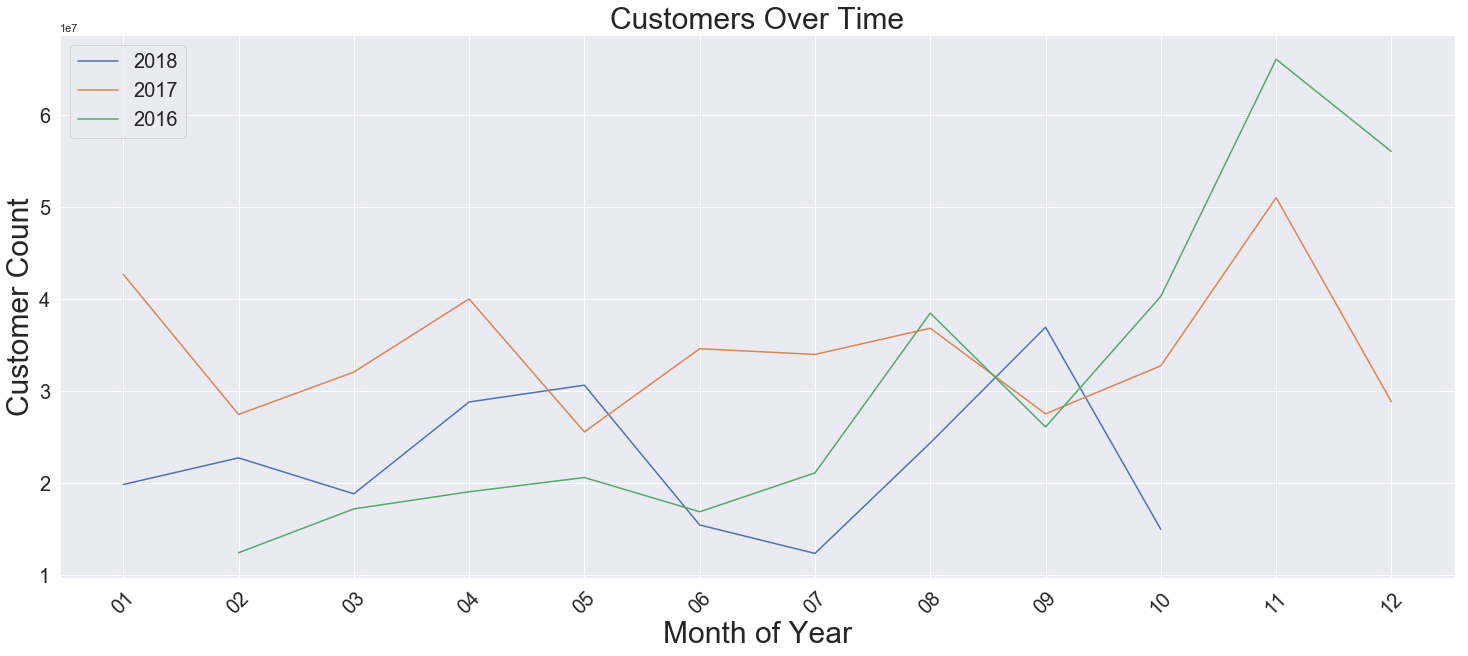

In [53]:
plt.figure(figsize=(25,10))
TYTrend = sns.lineplot(x='Gregorian_Month_Nbr',y='Revenue',data=df_custcnt.loc[df_custcnt['Gregorian_Year_Nbr']=='2018'],label='2018')
LYTrend = sns.lineplot(x='Gregorian_Month_Nbr',y='Revenue',data=df_custcnt.loc[df_custcnt['Gregorian_Year_Nbr']=='2017'],label='2017')
TWOYRTrend = sns.lineplot(x='Gregorian_Month_Nbr',y='Revenue',data=df_custcnt.loc[df_custcnt['Gregorian_Year_Nbr']=='2016'],label='2016')
plt.xticks(rotation=45, size = 20)
plt.yticks(size=20)
plt.title('Customers Over Time', size = 30)
plt.ylabel('Customer Count', size = 30)
plt.xlabel('Month of Year', size = 30)
plt.legend(fontsize=20)
plt.show()

In [54]:
df_custcntTY = df_custcnt.loc[df_custcnt['Gregorian_Year_Nbr']=='2018']

In [55]:
df_custcntLY = df_custcnt.loc[df_custcnt['Gregorian_Year_Nbr']=='2017']

In [56]:
df_custcnt2YR = df_custcnt.loc[df_custcnt['Gregorian_Year_Nbr']=='2016']

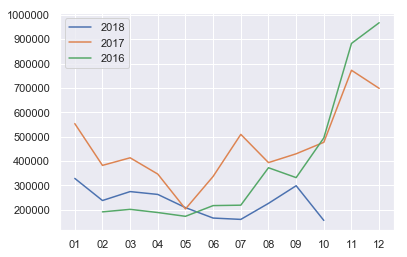

In [57]:
plt.plot(df_custcntTY['Gregorian_Month_Nbr'],df_custcntTY['Units'], label='2018')
plt.plot(df_custcntLY['Gregorian_Month_Nbr'],df_custcntLY['Units'], label='2017')
plt.plot(df_custcnt2YR['Gregorian_Month_Nbr'],df_custcnt2YR['Units'],label='2016')
plt.legend()

# Time to Build Out That Model!

In [58]:
#creating my lists for the date ranges I want to split into my test and validation sets. Note I'm going to cut out 201811 as it's not complete
test_months = ['201810','201809','201808']
val_months = ['201807','201806','201805']

In [59]:
df_test = past_df[past_df.month_year.isin(test_months)]

In [60]:
df_val = past_df[past_df.month_year.isin(val_months)]

In [61]:
df_test.month_year.unique()

array(['201810', '201809', '201808'], dtype=object)

In [62]:
df_val.month_year.unique()

array(['201805', '201807', '201806'], dtype=object)

In [63]:
df_train = past_df[~past_df.month_year.isin(val_months)]
df_train = df_train[~df_train.month_year.isin(test_months)]

In [64]:
a = df_train.month_year.unique()
print(np.sort(a))

['201602' '201603' '201604' '201605' '201606' '201607' '201608' '201609'
 '201610' '201611' '201612' '201701' '201702' '201703' '201704' '201705'
 '201706' '201707' '201708' '201709' '201710' '201711' '201712' '201801'
 '201802' '201803' '201804']


In [65]:
#perfect so my training set is ~80% of my data, my validation set is ~10% and my test set another ~10%
print(df_train.shape, df_val.shape, df_test.shape)

(239173, 17) (24407, 17) (26335, 17)


In [66]:
#now to split into my x's and y's
y_train = df_train['Purchased']
X_train = df_train.drop(['Purchased', 'Party_Id', 'Gregorian_Month_Nbr', 'Gregorian_Year_Nbr'], axis=1)
y_val = df_val['Purchased']
X_val = df_val.drop(['Purchased', 'Party_Id', 'Gregorian_Month_Nbr', 'Gregorian_Year_Nbr'], axis=1)
y_test = df_test['Purchased']
X_test = df_test.drop(['Purchased', 'Party_Id', 'Gregorian_Month_Nbr', 'Gregorian_Year_Nbr'], axis=1)

In [67]:
y_train = df_train['Purchased_Future']
X_train = df_train.drop(['Purchased_Future', 'Party_Id', 'Gregorian_Month_Nbr', 'Gregorian_Year_Nbr','time_indicator','month_year'], axis=1)
y_val = df_val['Purchased_Future']
X_val = df_val.drop(['Purchased_Future', 'Party_Id', 'Gregorian_Month_Nbr', 'Gregorian_Year_Nbr','time_indicator','month_year'], axis=1)
y_test = df_test['Purchased_Future']
X_test = df_test.drop(['Purchased_Future', 'Party_Id', 'Gregorian_Month_Nbr', 'Gregorian_Year_Nbr','time_indicator','month_year'], axis=1)

In [68]:
#because our target is a 0 or 1 value we have a classification problem
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
logr = LogisticRegression()
cls = RandomForestClassifier()

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [69]:
tree = DecisionTreeClassifier().fit(X_train,y_train)

In [70]:
tree.score(X_train,y_train)

0.7339708077416766

In [71]:
tree.score(X_val,y_val)

0.7169664440529356

In [72]:
tree.score(X_test,y_test)

0.700398708942472

In [73]:
def scores(model):
    test_score = model.score(X_train,y_train)
    val_score = model.score(X_val,y_val)
    print('Test Score = {}'.format(test_score))
    print('Val Score = {}'.format(val_score))

In [74]:
tree_5 = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
scores(tree_5)

Test Score = 0.706785464914518
Val Score = 0.7247101241447126


In [75]:
tree_2 = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
scores(tree_2)

Test Score = 0.7036831080431319
Val Score = 0.7222108411521285


In [76]:
tree_20 = DecisionTreeClassifier(max_depth=20).fit(X_train,y_train)
scores(tree_20)

Test Score = 0.7186179041948715
Val Score = 0.7202032203875938


In [77]:
#okay so we're not really getting any better here

In [78]:
#lets try a logistic regression
logr = logr.fit(X_train,y_train)

In [79]:
scores(logr)

Test Score = 0.7020859377939818
Val Score = 0.7194657270455197


In [80]:
logr.score(X_test,y_test)

0.7035883804822479

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

In [97]:
#check out performance against a dummy classifer
dr = DummyClassifier()
dr = dr.fit(X_train, y_train)

In [98]:
scores(dr)

Test Score = 0.5812988924335105
Val Score = 0.590527307739583


In [99]:
#welp that's fuckin weird
dr.score(X_test, y_test)

0.5844313651034745

In [100]:
print (classification_report(y_val,dr.predict(X_val)))

             precision    recall  f1-score   support

          0       0.72      0.70      0.71     17569
          1       0.28      0.29      0.29      6838

avg / total       0.60      0.59      0.59     24407



In [101]:
print (classification_report(y_test,dr.predict(X_test)))

             precision    recall  f1-score   support

          0       0.70      0.70      0.70     18535
          1       0.29      0.30      0.30      7800

avg / total       0.58      0.58      0.58     26335



In [103]:
confusion_matrix(y_test, dr.predict(X_test))

array([[13061,  5474],
       [ 5515,  2285]])

In [104]:
#so I'm just super good at picking when you won't buy, DOPE!
print(classification_report(y_test, logr.predict_proba(X_test)[:, 1] > .05)) 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     18535
          1       0.30      1.00      0.46      7800

avg / total       0.09      0.30      0.14     26335



/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
print (classification_report(y_val,logr.predict(X_val)))

             precision    recall  f1-score   support

          0       0.72      0.99      0.84     17569
          1       0.49      0.02      0.05      6838

avg / total       0.66      0.72      0.61     24407



In [106]:
params = {
    'n_estimators': range(1, 30, 1),
    'max_depth': range(1, 20, 1),
}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(cls, params, scoring='roc_auc', n_jobs=4)

gs.fit(X_train, y_train)

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, 

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'n_estimators': range(1, 30), 'max_depth': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [109]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [110]:
gs.best_score_

0.607132929269055

In [111]:
cls = RandomForestClassifier(n_estimators=26, max_depth=8, oob_score=True)

In [112]:
#final modelfitting
cls.fit(X_train, y_train)

/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [113]:
cls.oob_score_

0.70462803075598

In [114]:
print(classification_report(y_test, cls.predict_proba(X_test)[:, 1] > .05)) 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     18535
          1       0.30      1.00      0.46      7800

avg / total       0.09      0.30      0.14     26335



/Users/jbender/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [115]:
print(classification_report(y_test, cls.predict(X_test))) 

             precision    recall  f1-score   support

          0       0.72      0.96      0.82     18535
          1       0.54      0.12      0.20      7800

avg / total       0.67      0.71      0.64     26335



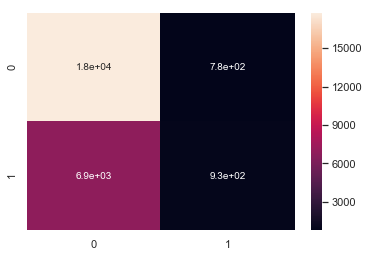

In [116]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True)

In [117]:
confusion_matrix(y_test, cls.predict(X_test))

array([[17756,   779],
       [ 6868,   932]])

In [118]:
from sklearn.metrics import roc_auc_score

roc_auc_score(cls.predict(X_test), y_test)

0.6328979078538175

In [119]:
roc_auc_score(cls.predict(X_val), y_val)

0.6334665940718036

In [120]:
X_train.columns

Index(['Loyalty_Member', 'Credit_Card_Member', 'Gift Indicated',
       'Gift Wrapped', 'Registry Gift', 'Purchased', 'Units', 'Orders',
       'Revenue', 'Visits', 'Product Viewing Visits'],
      dtype='object')

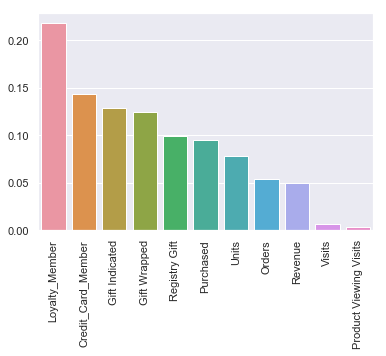

In [121]:
ordered_features = np.argsort(-1 * cls.feature_importances_)
features = list(X_test.columns.values)
plt.xticks(rotation=90)
ax = sns.barplot(features,
            cls.feature_importances_[ordered_features])


In [162]:
#outliers could definitely be a factor here, need to figure out how to scrub those
#may also want to actually do some feature selection